#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.05 Computing Magnitude and Phase</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 2</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

unknownmagnitude6 = 10
unknownfrequency6 = 3
unknownmagnitude7 = 13
unknownfrequency7 = 4
unknownmagnitude8 = 20
unknownfrequency8 = 2
unknownmagnitude9 = 50
unknownfrequency9 = 5
unknownmagnitude10 = 32
unknownfrequency10 = 3
unknownmagnitude11 = 42
unknownfrequency11 = 4
unknownmagnitude12 = 100
unknownfrequency12 = 4
unknownphase12 =np.pi/2
unknownmagnitude13 = 42
unknownfrequency13 = 5
unknownphase13 =np.pi/3
unknownmagnitude14 = 85
unknownfrequency14 = 2
unknownphase14 =np.pi/6
unknownmagnitude15 = 25
unknownfrequency15 = 4
unknownphase15 = 2 *np.pi


## <font color=red>DSP.05.G2) Obtaining the Magnitude of a Timeseries that Contains Two Sine Waves</font>

### <font color=red>DSP.05.G2.a) Probing a Timeseries of Unknown Frequencies</font>

Take a timeseries that is the sum of two unknown integer sine waves and use sine and cosine functions to find
the frequencies (and associated magnitudes) composing the timeseries. Create a plot comparing the
original and the estimated waveforms to document that your calculations are correct.

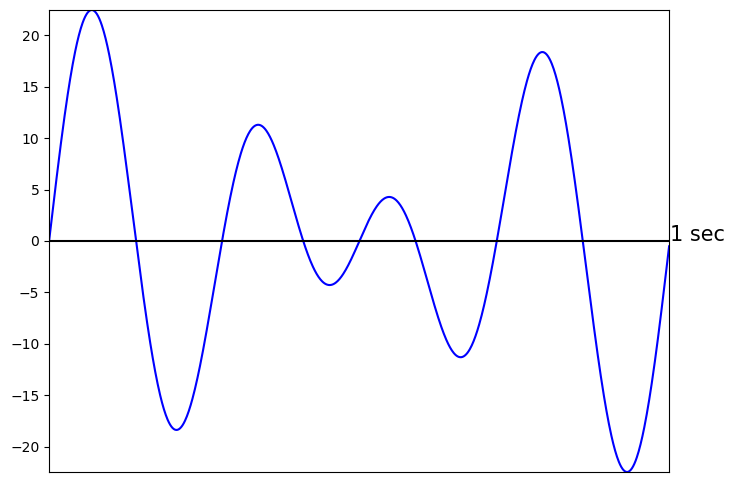

In [3]:
time = np.arange(0,1,0.001)
timeseries = (unknownmagnitude6 * np.sin(2*np.pi * unknownfrequency6 * time ) +\
              unknownmagnitude7 * np.sin(2*np.pi * unknownfrequency7 * time )) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

### <font color=red>DSP.05.G2.b) Probing a Timeseries of Unknown Frequencies</font>

Take a timeseries that is the sum of two unknown integer sine waves and use sine and cosine functions
to find the frequencies (and associated magnitudes) composing the timeseries.

Create a plot comparing the original and the estimated waveforms to show that your calculations are
correct.

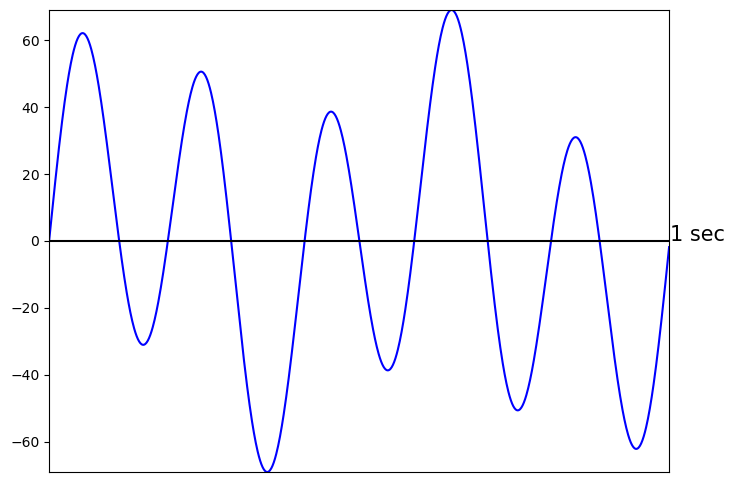

In [4]:
time = np.arange(0,1,0.001)
timeseries = (unknownmagnitude8 * np.sin(2*np.pi * unknownfrequency8 * time ) + \
              unknownmagnitude9 * np.sin(2*np.pi * unknownfrequency9 * time )) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

### <font color=red>DSP.05.G2.c) A Variation on a Theme</font>

Stay with the above example. Repeat the procedures above using sine and cosine functions expressed
as complex exponentials.

Since you already know the frequencies composing the timeseries, you don't need to show calculations
at frequencies of no interest.

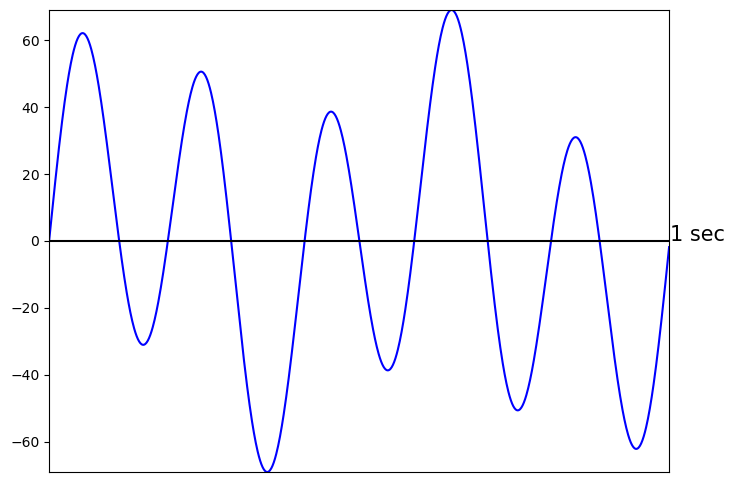

In [5]:
time = np.arange(0,1,0.001)
timeseries = (unknownmagnitude8 * np.sin(2*np.pi * unknownfrequency8 * time ) + \
              unknownmagnitude9 * np.sin(2*np.pi * unknownfrequency9 * time )) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

To get you started, here is the timeseries multiplied by a 1 Hz sine wave expressed as a complex
exponential.

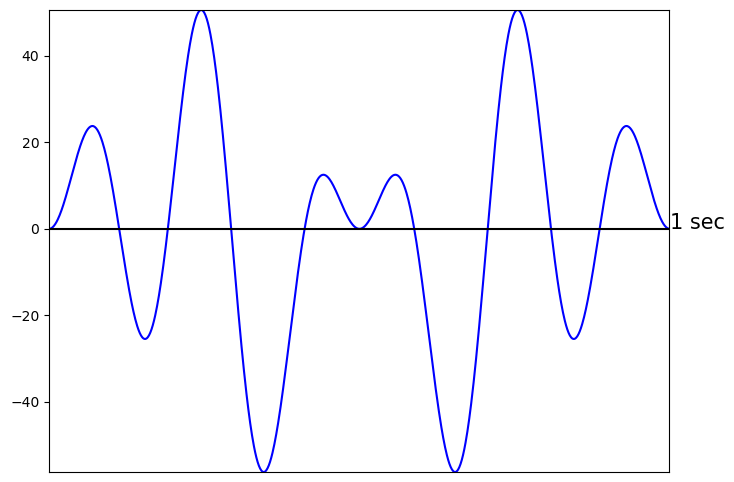

In [6]:
time = np.arange(0,1,0.001)
timeseries = (unknownmagnitude8 * np.sin(2*np.pi * unknownfrequency8 * time ) + \
              unknownmagnitude9 * np.sin(2*np.pi * unknownfrequency9 * time )) 
amp_complex = (np.exp(2*np.pi * 1j * time) - np.exp(-2*np.pi * 1j * time)) / (2j)
timeseries = timeseries * amp_complex 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

### <font color=red>DSP.05.G2.d) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Stay with the example above. This time, instead of using the complex exponential sine and cosine
identities, plug in $e^{i ω x}$, where ω is the frequency of interest.

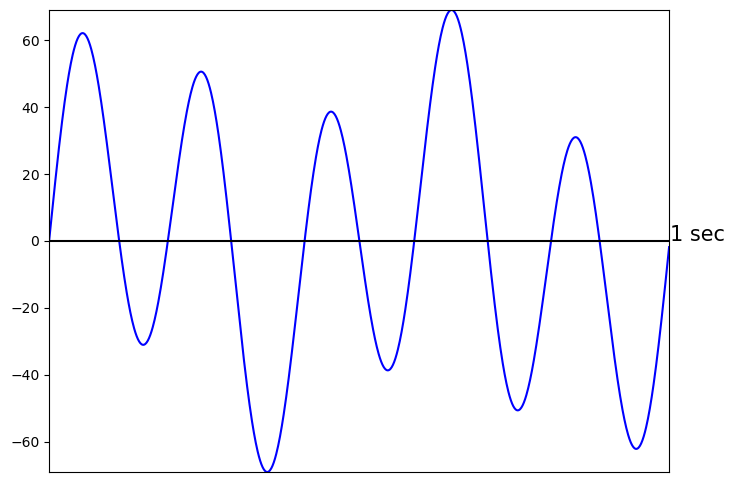

In [7]:
time = np.arange(0,1,0.001)
timeseries = (unknownmagnitude8 * np.sin(2*np.pi * unknownfrequency8 * time ) + \
              unknownmagnitude9 * np.sin(2*np.pi * unknownfrequency9 * time )) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

If you need guidance, take a look at the Chapter 5 Basics (DSP.05.B3.f).

### <font color=red>DSP.05.G2.e) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Here is new timeseries composed of two frequencies. Instead of using the complex exponential sine
and cosine identities, plug in $e^{i ω x}$, where ω is the frequency of interest to obtain a measure of the
frequencies (and their associated magnitude).

For each frequency, create a plot showing the magnitude of the complex values as a function of time.
At each frequency at which activity is observed, calculate the magnitude value.

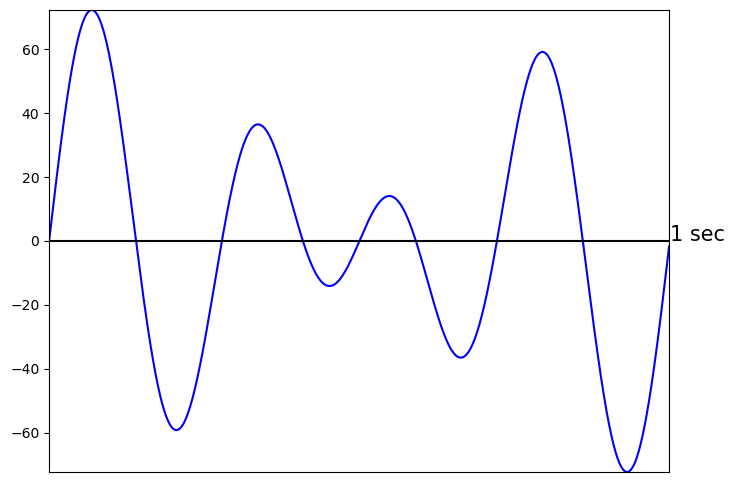

In [8]:
time = np.arange(0,1,0.001)
timeseries = (unknownmagnitude10 * np.sin(2*np.pi *unknownfrequency10 * time ) + \
              unknownmagnitude11 * np.sin(2*np.pi *unknownfrequency11 * time )) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

### <font color=red>DSP.05.G2.f) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Here is a new timeseries composed of two frequencies. Each frequency has a phase offset.

Use a method of your choice to obtain a measure of the frequencies composing the timeseries and the
associated magnitude and phase values.

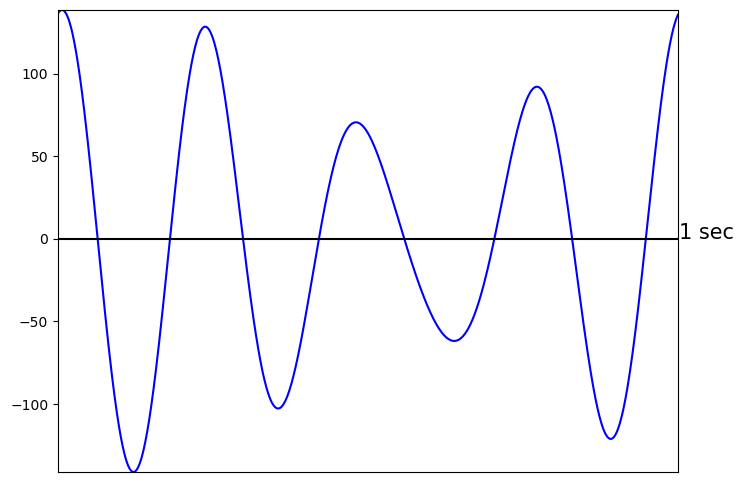

In [9]:
time = np.arange(0,1,0.001)
timeseries = (unknownmagnitude12 * np.sin(2*np.pi * unknownfrequency12 * time + unknownphase12) + \
              unknownmagnitude13 * np.sin(2*np.pi * unknownfrequency13 * time + unknownphase13)) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

### <font color=red>DSP.05.G2.g) Taking Advantage of Some Nice Properties of Complex Exponentials</font>

Here is a new timeseries composed of two frequencies. Use a method of your choice to obtain a measure
of the frequencies composing the timeseries and the associated magnitude and phase values.

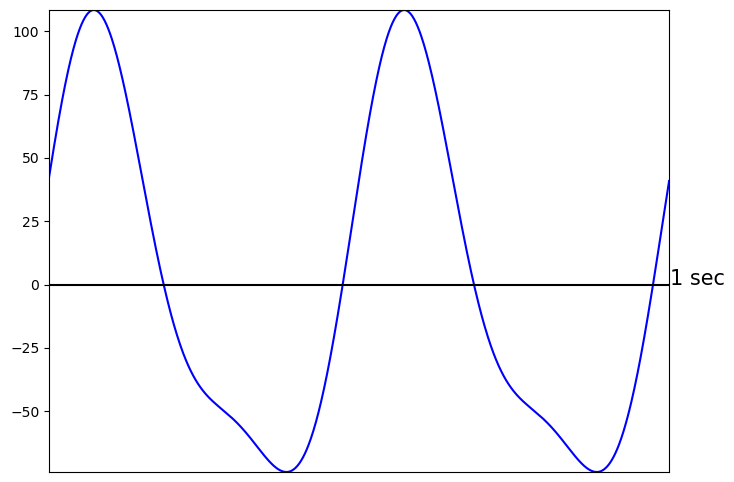

In [10]:
time = np.arange(0,1,0.001)
timeseries = (unknownmagnitude14 * np.sin(2*np.pi * unknownfrequency14 * time + unknownphase14) + \
              unknownmagnitude15 * np.sin(2*np.pi * unknownfrequency15 * time + unknownphase15)) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()